In [14]:
# importing packages
import sys
import argparse
import numpy as np
from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble
from utilities import visualize_classifier
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# an security that requires if the user wants to balance the data
request = input('Should it balance the weight..Yes/No').lower()

Should it balance the weight..Yes/No yes


In [9]:
# loading the data
input_file = 'data_imbalance.txt'

# reading the data
data = np.loadtxt(input_file, delimiter=',')
X,Y = data[:, :-1], data[:, -1]

In [35]:
# separating the data into classes based on their target labels
class_0 = np.array(X[Y==0])
class_1 = np.array(X[Y==1])
print(len(class_0), len(class_1))

250 1250


Text(0.5,1,'Input data')

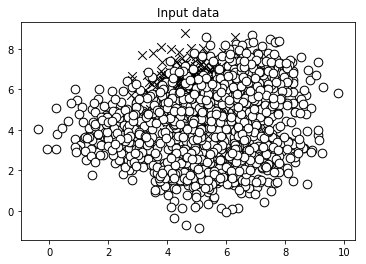

In [13]:
# visualizing the input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',
edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white',
edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

In [16]:
# splitting our data into training and testing datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=5)

In [18]:
print(len(X_train), len(Y_train))
print(len(X_test), len(Y_test))
print(len(X), len(Y))

1125 1125
375 375
1500 1500


In [37]:
# declaring the parmaters of our extra random forests classifier
/# declaring the parameters of the ensemble learning classifier
# n_estimator refers to the number of trees that will be constructed
# max_depth refers to the maximum numbers of levels in each tree
# random_state refers to the seed value of the random number generator needed to initialize the random forest classifier algorithm
# if we notice the classes are imbalanced we could use the class weight in our paramter declaration
# the class weight tells the classifier that it should balance the weight 
# so that it is proportional to the number of datapoints in each class
if request == 'yes':
    params = {'n_estimators':100, 'max_depth':4, 'random_state':0, 'class_weight':'balanced'}
else:
    raise(Exception('you said i should i not balance...which makes me unable to continue'))      

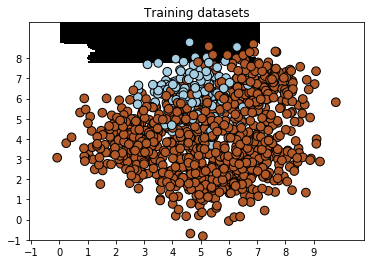

In [38]:
# creating the extra trees classifier
classifier = ensemble.ExtraTreesClassifier(**params)

# training the classifier model
classifier.fit(X_train, Y_train)

# visualizing the training data
visualize_classifier(classifier, X_train, Y_train, 'Training datasets')

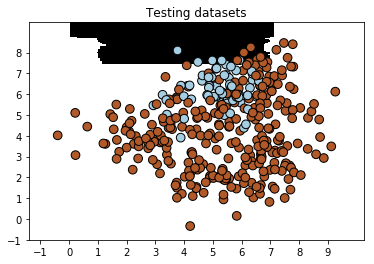

In [39]:
# prediciting the output of the test dataset ..note: output that we already know
# predicting the output would help us to be enable to perform our evaluation of
# how well the model performs
Y_test_predict = classifier.predict(X_test)

# visualizing the testing datasets
visualize_classifier(classifier, X_test, Y_test, 'Testing datasets')

In [40]:
# just doing seyi stuff of manually checking if the model actually does
# a good work before i compute the performance..this would give me a
# glimpse of how well the model performed...
print('DATAPOINT-->PREDICTED CLASS--->ACTUAL CLASS')
for i in range(len(X_test)):
    print(X_test[i],'-->', Y_test_predict[i],'--->',Y_test[i])
# what i am actually doing is that i am comparing the predicted class
# to the actual class that we already know

DATAPOINT-->PREDICTED CLASS--->ACTUAL CLASS
[2.09 4.2 ] --> 1.0 ---> 1.0
[3.88 3.91] --> 1.0 ---> 0.0
[5.26 5.46] --> 0.0 ---> 1.0
[7.08 1.56] --> 1.0 ---> 1.0
[6.93 5.05] --> 1.0 ---> 1.0
[2.   4.41] --> 1.0 ---> 1.0
[3.17 3.68] --> 1.0 ---> 1.0
[4.45 5.08] --> 0.0 ---> 1.0
[5.62 5.66] --> 0.0 ---> 0.0
[5.52 5.77] --> 0.0 ---> 0.0
[4.12 6.4 ] --> 0.0 ---> 0.0
[4.9  5.75] --> 0.0 ---> 1.0
[6.05 7.13] --> 0.0 ---> 1.0
[7.95 3.63] --> 1.0 ---> 1.0
[5.57 1.95] --> 1.0 ---> 1.0
[6.51 5.88] --> 0.0 ---> 0.0
[5.61 6.33] --> 0.0 ---> 0.0
[2.25 3.61] --> 1.0 ---> 1.0
[4.46 2.37] --> 1.0 ---> 1.0
[2.93 5.46] --> 0.0 ---> 0.0
[7.3  3.76] --> 1.0 ---> 1.0
[5.47 6.92] --> 0.0 ---> 0.0
[5.96 5.6 ] --> 0.0 ---> 0.0
[7.16 3.29] --> 1.0 ---> 1.0
[5.67 5.75] --> 0.0 ---> 0.0
[4.15 6.36] --> 0.0 ---> 1.0
[2.88 3.96] --> 1.0 ---> 1.0
[6.79 5.65] --> 0.0 ---> 1.0
[6.1  5.32] --> 0.0 ---> 1.0
[5.56 6.78] --> 0.0 ---> 0.0
[3.93 4.43] --> 1.0 ---> 1.0
[6.67 3.11] --> 1.0 ---> 1.0
[7.26 6.48] --> 1.0 ---> 1.0

In [1]:
# evaluating the perfomance of the classifier on the training datasets
class_names = ['class-0', 'class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(metrics.classification_report(Y_train, classifier.predict(X_train),target_names=class_names))
print("#"*40 + "\n")

# evaluating the perfomance of the classifier on the training datasets
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(metrics.classification_report(Y_test, Y_test_predict,target_names=class_names))
print("#"*40 + "\n")


########################################

Classifier performance on training dataset



NameError: name 'metrics' is not defined

In [58]:
# trying to test my model with other datapoints 
datapoints = np.array([[6.73,3.42], [5.8,4.8], [3.4, 6.8]])
for datapoint in datapoints:
    new_predict = classifier.predict_proba(datapoints)
    print('\ndatapoint:{}'.format(datapoint))
    print('probabilities:{}'.format(new_predict))
    print('predicted class: Class '+str(np.argmax(new_predict)))


datapoint:[6.73 3.42]
probabilities:[[0.28221558 0.71778442]
 [0.51986853 0.48013147]
 [0.6804698  0.3195302 ]]
predicted class: Class 1

datapoint:[5.8 4.8]
probabilities:[[0.28221558 0.71778442]
 [0.51986853 0.48013147]
 [0.6804698  0.3195302 ]]
predicted class: Class 1

datapoint:[3.4 6.8]
probabilities:[[0.28221558 0.71778442]
 [0.51986853 0.48013147]
 [0.6804698  0.3195302 ]]
predicted class: Class 1
